#notebooks.exact_grover_state_preparation_1d
Sample generation from a beta distribution using the exact version of the Grover state preparation algorithm.

In [1]:
from config import *
from utilities.grover_state_preparation import *

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import beta, chisquare, entropy, wasserstein_distance
from qiskit import transpile

In [3]:
alpha = 2
beta_ = 2
m = 4
a = 0
b = 1

In [4]:
p_i_set = beta.pdf(np.linspace(a, b, 2**m-1), alpha, beta_)
p_i_set /= p_i_set.sum()

In [5]:
thetas = get_grover_angles(p_i_set,m)
qc = state_expansion(m,thetas)
t_qc = transpile(qc, backend=backend)
job = backend.run(t_qc, shots=shots)
counts = job.result().get_counts(qc)
total_counts = sum(counts.values())
samples = {key: value / total_counts for key, value in counts.items()}


In [6]:
num_states = 2**m-1
all_states = [format(i, f"0{m}b") for i in range(num_states)]
samples_full = {state: samples.get(state, 0) for state in all_states}
y = np.array([samples_full[state] for state in all_states])
y /= y.sum()

In [7]:
chi_stat, chi_p = chisquare(y, f_exp=p_i_set)
kl_div = entropy(y, p_i_set)
emd = wasserstein_distance(y, p_i_set)
print(f"Chi-Square Test: statistic={chi_stat}, p-value={chi_p}")
print(f"KL Divergence: {kl_div}")
print(f"Earth Mover's Distance: {emd}")

Chi-Square Test: statistic=nan, p-value=nan
KL Divergence: 0.004636748285966343
Earth Mover's Distance: 0.004705815018315015


/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:7985: RuntimeWarning: invalid value encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


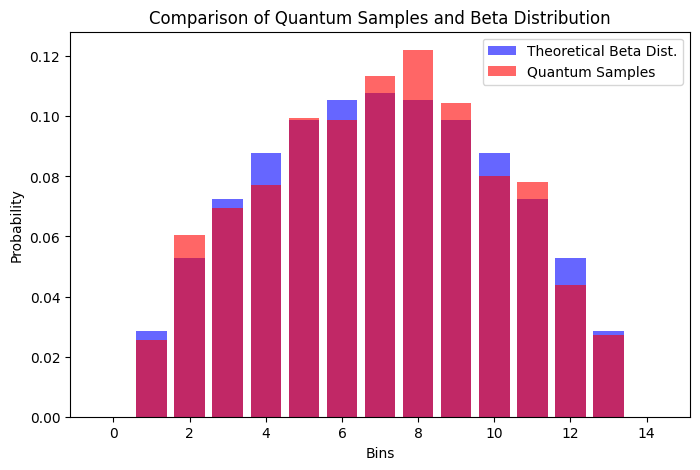

In [8]:
plt.figure(figsize=(8, 5))
plt.bar(range(len(p_i_set)), p_i_set, alpha=0.6, label='Theoretical Beta Dist.', color='blue')
plt.bar(range(len(y)), y, alpha=0.6, label='Quantum Samples', color='red')
plt.xlabel("Bins")
plt.ylabel("Probability")
plt.legend()
plt.title("Comparison of Quantum Samples and Beta Distribution")
plt.show()
